In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
raw_data = pd.read_csv("epi_r.csv")

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [8]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
raw_data.yogurt.describe()

count    20052.000000
mean         0.026332
std          0.160123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: yogurt, dtype: float64

In [4]:
raw_data.shape

(20052, 680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

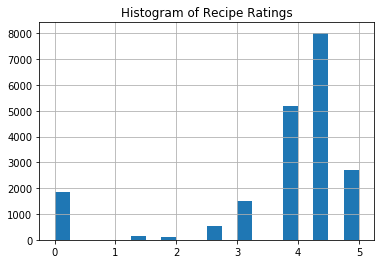

In [6]:
raw_data.rating.hist(bins=20)
plt.title("Histogram of Recipe Ratings")
plt.show()

In [7]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [9]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(["rating", "title", "calories", "protein", "fat", "sodium"],1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
plt.scatter(Y, svr.predict(X))

In [ ]:
svr.score(X,Y)

In [ ]:
from sklearn.model_selectionselection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

### Challenge Directions

We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [11]:
from sklearn.decomposition import PCA 

X = raw_data.drop(["rating", "title", "calories", "protein", "fat", "sodium"],1)
sklearn_pca = PCA()
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [1.23103253e-01 4.41408400e-02 3.88322681e-02 2.64831776e-02
 2.28001767e-02 1.86733892e-02 1.62492478e-02 1.51096089e-02
 1.43032983e-02 1.34029773e-02 1.24519503e-02 1.18638468e-02
 1.14950922e-02 1.03184283e-02 1.00255485e-02 9.33038817e-03
 9.09652854e-03 8.88570465e-03 8.67782246e-03 8.40347349e-03
 8.21827545e-03 8.09861460e-03 7.78442239e-03 7.70138090e-03
 7.57173238e-03 7.25357027e-03 7.13978715e-03 7.04659673e-03
 6.87045978e-03 6.77890696e-03 6.59587941e-03 6.44924452e-03
 6.31733222e-03 6.16825283e-03 6.02749492e-03 5.86697714e-03
 5.77700032e-03 5.54316885e-03 5.43935130e-03 5.35577068e-03
 5.19637045e-03 4.99189715e-03 4.93621153e-03 4.80575400e-03
 4.73195595e-03 4.60847162e-03 4.49400864e-03 4.42921889e-03
 4.30624253e-03 4.28271472e-03 4.23360801e-03 4.18533836e-03
 4.03925289e-03 3.99315042e-03 3.90306343e-03 3.89700201e-03
 3.86119384e-03 3.78780422e-03 3.71598613e-03 3.613

In [12]:
sklearn_pca.explained_variance_ratio_.cumsum()

array([0.12310325, 0.16724409, 0.20607636, 0.23255954, 0.25535972,
       0.2740331 , 0.29028235, 0.30539196, 0.31969526, 0.33309824,
       0.34555019, 0.35741403, 0.36890913, 0.37922755, 0.3892531 ,
       0.39858349, 0.40768002, 0.41656572, 0.42524355, 0.43364702,
       0.4418653 , 0.44996391, 0.45774833, 0.46544971, 0.47302145,
       0.48027502, 0.4874148 , 0.4944614 , 0.50133186, 0.50811077,
       0.51470665, 0.52115589, 0.52747322, 0.53364148, 0.53966897,
       0.54553595, 0.55131295, 0.55685612, 0.56229547, 0.56765124,
       0.57284761, 0.57783951, 0.58277572, 0.58758147, 0.59231343,
       0.5969219 , 0.60141591, 0.60584513, 0.61015137, 0.61443408,
       0.61866769, 0.62285303, 0.62689228, 0.63088543, 0.6347885 ,
       0.6386855 , 0.64254669, 0.6463345 , 0.65005048, 0.65366442,
       0.6572325 , 0.66071971, 0.66417856, 0.66756432, 0.67092072,
       0.6742281 , 0.67752525, 0.68073332, 0.68388469, 0.68700771,
       0.69007024, 0.69310583, 0.69611482, 0.69906513, 0.70195

In [13]:
#the first 30 components explain 50.8% of the variance

sk_learn = PCA(n_components=30)
X_with30_components = sk_learn.fit_transform(X)



In [14]:
raw_data["rating"] = np.where(raw_data["rating"] < 4, 0, 1)

In [15]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,0,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.svm import SVC

In [17]:
X = X_with30_components
Y = raw_data["rating"]
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
svm.score(X,Y)

0.5784460402952324

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([0.57142857, 0.58015457, 0.56768886, 0.58179551, 0.57520579])